In [7]:
# 환경세팅
!apt-get install -y openjdk-11-jdk > /dev/null
!pip install -q konlpy
!apt-get install -y fonts-nanum > /dev/null

E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?
E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


In [26]:
# 1. 패키지 리스트 업데이트
!sudo apt-get update

# 2. openjdk 11 버전 설치 (sudo 사용)
!sudo apt-get install -y openjdk-11-jdk

Get:1 http://archive.ubuntu.com/ubuntu noble InRelease [256 kB]
Get:2 http://security.ubuntu.com/ubuntu noble-security InRelease [126 kB]
Get:3 http://archive.ubuntu.com/ubuntu noble-updates InRelease [126 kB]
Get:4 http://security.ubuntu.com/ubuntu noble-security/multiverse amd64 Packages [33.1 kB]
Get:5 http://archive.ubuntu.com/ubuntu noble-backports InRelease [126 kB]
Get:6 http://security.ubuntu.com/ubuntu noble-security/main amd64 Packages [1639 kB]
Get:7 http://archive.ubuntu.com/ubuntu noble/universe amd64 Packages [19.3 MB]
Get:8 http://security.ubuntu.com/ubuntu noble-security/restricted amd64 Packages [2703 kB]
Get:9 http://security.ubuntu.com/ubuntu noble-security/universe amd64 Packages [1170 kB]
Get:10 http://archive.ubuntu.com/ubuntu noble/multiverse amd64 Packages [331 kB]
Get:11 http://archive.ubuntu.com/ubuntu noble/main amd64 Packages [1808 kB]
Get:12 http://archive.ubuntu.com/ubuntu noble/restricted amd64 Packages [117 kB]
Get:13 http://archive.ubuntu.com/ubuntu nob

In [22]:
!apt-get install openjdk-11-jdk -y

E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


In [28]:
# Python 환경 변수 설정
import os
import matplotlib.pyplot as plt

# Java 경로 환경변수 설정 (konlpy용)
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["PATH"] += os.pathsep + os.path.join(os.environ["JAVA_HOME"], "bin")

# 폰트 설정
plt.rc('font', family='NanumGothic')

In [9]:
import os
print(os.getcwd())

/home/jovyan/aiffel


In [10]:
import pandas as pd

train_data_path = "dktc/data/train.csv"   # 경로 수정
train_data = pd.read_csv(train_data_path)
train_data.head()

,idx,class,conversation
0,0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...


In [11]:
# 텍스트 정제(개행문자, 공백, 특수문자 정리)

import re

def clean_text(s):
    if not isinstance(s, str):
        return ""
    s = s.replace('\\n', ' ').replace('\n', ' ').replace('\r', ' ').replace('\t', ' ')
    s = re.sub(r'https?://\S+|www\.\S+', ' ', s)         # URL 제거
    s = re.sub(r'[\u200b\u200c\u200d\ufeff]', ' ', s)    # 제로폭 문자 제거
    s = re.sub(r'[^ㄱ-ㅎ가-힣0-9a-zA-Z\s]', ' ', s)      # 한글, 숫자, 알파벳 외 제거
    s = re.sub(r'\s+', ' ', s).strip()                   # 다중 공백 → 한 칸
    return s

train_data['conversation'] = train_data['conversation'].apply(clean_text)
train_data.head(3)

,idx,class,conversation
0,0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가 아닙니다 죄송합니다 죽을 거면 혼자 죽...
1,1,협박 대화,길동경찰서입니다 9시 40분 마트에 폭발물을 설치할거다 네 똑바로 들어 한번만 더 ...
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지 나보다 작은 남자는 첨봤어 그만해 니들 놀리는거 재미없어 지...


In [14]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 기본 폰트 후보 확인
available_fonts = set(f.name for f in fm.fontManager.ttflist)
print("✅ 사용 가능한 폰트 예시:", list(available_fonts)[:10])  # 일부 출력

# 사용할 폰트를 선택 — 보통 'DejaVu Sans' 또는 'Arial'은 항상 존재함
plt.rcParams['font.family'] = 'DejaVu Sans'   # 안전한 기본 폰트
plt.rcParams['axes.unicode_minus'] = False    # 마이너스 기호 깨짐 방지

print("✅ 폰트 설정 완료: DejaVu Sans")


✅ 사용 가능한 폰트 예시: ['cmex10', 'STIXSizeFiveSym', 'Latin Modern Mono Caps', 'STIXNonUnicode', 'cmb10', 'Latin Modern Roman Dunhill', 'C059', 'STIXSizeOneSym', 'STIXGeneral', 'cmmi10']
✅ 폰트 설정 완료: DejaVu Sans


count    3950.000000
mean      213.199494
std        99.566580
min        37.000000
25%       147.000000
50%       191.000000
75%       255.000000
max       839.000000
Name: length, dtype: float64


/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44600 (\N{HANGUL SYLLABLE GIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/

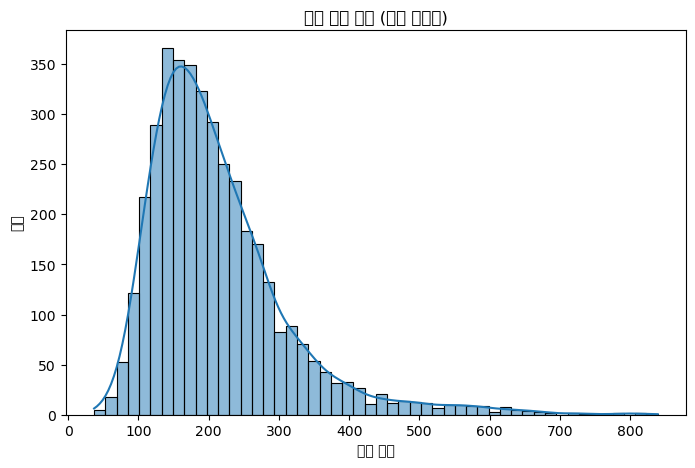

In [15]:
# 문장 길이 분포

import seaborn as sns
import matplotlib.pyplot as plt

# 문장 길이 계산
train_data['length'] = train_data['conversation'].apply(len)

# 문장 길이의 기본 통계값 확인
print(train_data['length'].describe())

# 히스토그램 시각화
plt.figure(figsize=(8,5))
sns.histplot(train_data['length'], bins=50, kde=True)
plt.title('문장 길이 분포 (전체 데이터)')
plt.xlabel('문장 길이')
plt.ylabel('빈도')
plt.show()


/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/cond

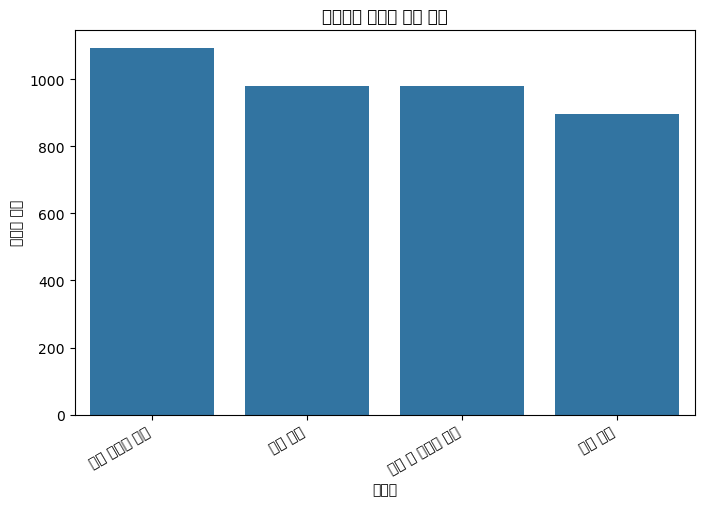

class
기타 괴롭힘 대화      1094
갈취 대화           981
직장 내 괴롭힘 대화     979
협박 대화           896
Name: count, dtype: int64


In [16]:
# 클래스별 데이터 개수 분포

plt.figure(figsize=(8,5))
sns.countplot(x='class', data=train_data, order=train_data['class'].value_counts().index)
plt.title('클래스별 데이터 개수 분포')
plt.xlabel('클래스')
plt.ylabel('데이터 개수')
plt.xticks(rotation=30, ha='right')
plt.show()

# 클래스별 개수 출력
print(train_data['class'].value_counts())


/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54801 (\N{HANGUL SYLLABLE HYEOB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48149 (\N{HANGUL SYLLABLE BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt

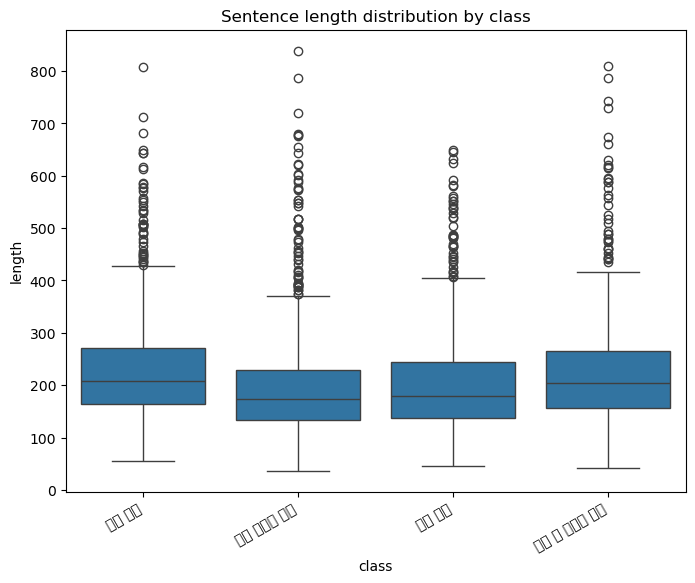

In [21]:
# 클래스별 문장 길이 분포 비교

plt.figure(figsize=(8,6))
sns.boxplot(x='class', y='length', data=train_data)
plt.title('Sentence length distribution by class')
plt.xlabel('class')
plt.ylabel('length')
plt.xticks(rotation=30, ha='right')
plt.show()

In [29]:
from konlpy.tag import Okt

try:
    okt = Okt()
    print("✅ Konlpy Okt 인스턴스 생성 성공!")
except Exception as e:
    print(f"🚨 오류 발생: {e}")
    print("---")
    print("만약 JAVA_HOME 관련 오류가 계속되면")

✅ Konlpy Okt 인스턴스 생성 성공!


In [30]:
# 형태소 분석기로 '단어' 추출하기 (Tokenization)

from konlpy.tag import Okt

# Okt 형태소 분석기 인스턴스 생성
okt = Okt()

# 명사만 추출하는 함수 정의
def extract_nouns(text):
    try:
        nouns = okt.nouns(text)
        # 2글자 이상인 명사만 선택 (너무 짧은 단어 제외)
        return [noun for noun in nouns if len(noun) > 1]
    except Exception as e:
        print(f"Error: {e}, Text: {text}")
        return []

# 테스트
sample_text = train_data['conversation'].iloc[0]
print(f"원본: {sample_text}")
print(f"명사 추출: {extract_nouns(sample_text)}")

원본: 지금 너 스스로를 죽여달라고 애원하는 것인가 아닙니다 죄송합니다 죽을 거면 혼자 죽지 우리까지 사건에 휘말리게 해 진짜 죽여버리고 싶게 정말 잘못했습니다 너가 선택해 너가 죽을래 네 가족을 죽여줄까 죄송합니다 정말 잘못했습니다 너에게는 선택권이 없어 선택 못한다면 너와 네 가족까지 모조리 죽여버릴거야 선택 못하겠습니다 한번만 도와주세요 그냥 다 죽여버려야겠군 이의 없지 제발 도와주세요
명사 추출: ['지금', '스스로', '달라', '애원', '혼자', '죽지', '우리', '사건', '말리', '진짜', '정말', '선택', '가족', '정말', '선택', '선택', '가족', '모조리', '선택', '한번', '그냥', '이의', '제발']


In [31]:
# 불용어(Stopwords) 정의 및 제거

# 1. 불용어 리스트 정의 (필요에 따라 계속 추가해주세요)
korean_stopwords = [
    '이', '그', '저', '것', '수', '등', '때', '곳', '나', '너', '우리', '경우', 
    '사람', '일', '지금', '생각', '말', '안', '뭐', '정말', '왜', '오늘', '내일',
    '여기', '거기', '이제', '먼저', '하나', '무슨', '위해', '때문', '정도', 
    '그냥', '진짜', '너무', '완전', '혹시', '계속', '아니', '알', '더', '좀'
]

# 2. 불용어를 제거하며 명사를 추출하는 함수로 업그레이드
def extract_nouns_with_stopwords(text):
    try:
        nouns = okt.nouns(text)
        # 2글자 이상 + 불용어 목록에 없는 명사만 선택
        return [noun for noun in nouns if len(noun) > 1 and noun not in korean_stopwords]
    except Exception as e:
        return []

# 3. 모든 대화(conversation)에 대해 토큰화 수행
# .apply()는 데이터가 많으면 시간이 좀 걸릴 수 있습니다.
train_data['tokens'] = train_data['conversation'].apply(extract_nouns_with_stopwords)

# 결과 확인
print(train_data[['conversation', 'tokens']].head())

                                        conversation  \
0  지금 너 스스로를 죽여달라고 애원하는 것인가 아닙니다 죄송합니다 죽을 거면 혼자 죽...   
1  길동경찰서입니다 9시 40분 마트에 폭발물을 설치할거다 네 똑바로 들어 한번만 더 ...   
2  너 되게 귀여운거 알지 나보다 작은 남자는 첨봤어 그만해 니들 놀리는거 재미없어 지...   
3  어이 거기 예 너 말이야 너 이리 오라고 무슨 일 너 옷 좋아보인다 얘 돈 좀 있나...   
4  저기요 혹시 날이 너무 뜨겁잖아요 저희 회사에서 이 선크림 파는데 한 번 손등에 발...   

                                              tokens  
0  [스스로, 달라, 애원, 혼자, 죽지, 사건, 말리, 선택, 가족, 선택, 선택, ...  
1  [길동, 경찰서, 마트, 폭발물, 설치, 똑바로, 한번, 얘기, 장난, 전화, 마트...  
2  [남자, 지영, 이지, 재는, 군대, 보태, 난쟁이, 장가, 희망, 이상, 키크, ...  
3                             [어이, 오라, 피시방, 마지막, 기회]  
4  [저기, 저희, 회사, 선크림, 손등, 발라, 선크림, 발라, 발라, 성분, 성분,...  


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'NanumGothic' not found.
/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49352 (\N{HANGUL SYLLABLE SAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45180 (\N{HANGUL SYLLABLE GGI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'NanumGothic' not found.
/opt/conda/lib/py

--- [가장 많이 등장한 주요 단어 (Top 50)] ---
[(np.str_('제발'), 900), (np.str_('새끼'), 640), (np.str_('이번'), 566), (np.str_('회사'), 532), (np.str_('그게'), 501), (np.str_('친구'), 491), (np.str_('대리'), 476), (np.str_('엄마'), 467), (np.str_('시간'), 460), (np.str_('소리'), 400), (np.str_('한번'), 389), (np.str_('그거'), 383), (np.str_('어디'), 380), (np.str_('신고'), 361), (np.str_('말씀'), 344), (np.str_('당장'), 342), (np.str_('자네'), 329), (np.str_('부장'), 329), (np.str_('당신'), 328), (np.str_('다시'), 321), (np.str_('저기'), 292), (np.str_('다른'), 286), (np.str_('저희'), 264), (np.str_('얼굴'), 254), (np.str_('누가'), 252), (np.str_('가족'), 250), (np.str_('저번'), 250), (np.str_('얘기'), 246), (np.str_('장난'), 246), (np.str_('이건'), 243), (np.str_('누구'), 241), (np.str_('과장'), 241), (np.str_('부탁'), 240), (np.str_('보고'), 236), (np.str_('조금'), 234), (np.str_('기분'), 226), (np.str_('선생님'), 225), (np.str_('요즘'), 224), (np.str_('정신'), 222), (np.str_('사장'), 215), (np.str_('다음'), 210), (np.str_('부모님'), 209), (np.str_('자꾸'), 204), (np.str_('고객'), 

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

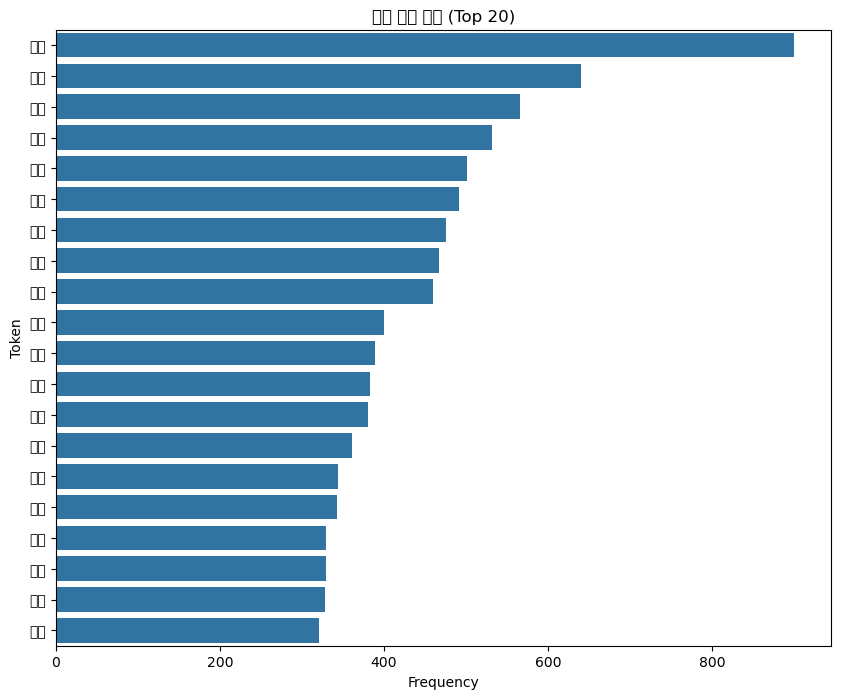

In [32]:
# 단어 빈도 분석하기

from collections import Counter
import numpy as np

# 1. 'tokens' 컬럼의 모든 리스트를 하나의 큰 리스트로 합치기
all_tokens = np.hstack(train_data['tokens'].values)

# 2. 단어 빈도 계산
token_counts = Counter(all_tokens)

# 3. 가장 많이 등장한 단어 50개 출력
print("--- [가장 많이 등장한 주요 단어 (Top 50)] ---")
print(token_counts.most_common(50))

# 4. (선택) 빈도수 상위 20개 단어 시각화
import seaborn as sns

top_n = 20
top_tokens = token_counts.most_common(top_n)
top_df = pd.DataFrame(top_tokens, columns=['Token', 'Frequency'])

plt.figure(figsize=(10, 8))
sns.barplot(x='Frequency', y='Token', data=top_df)
plt.title(f'주요 단어 빈도 (Top {top_n})')
plt.show()


In [34]:
print("\n--- [ ✨ 보완 1: 클래스별 주요 단어 Top 30 ] ---")

# 'class'로 그룹을 묶고, 각 그룹의 'tokens'를 모두 합칩니다.
all_tokens_grouped = train_data.groupby('class')['tokens'].apply(np.hstack)

# 각 클래스별로 빈도수를 계산하고 상위 20개를 출력합니다.
for class_name, tokens in all_tokens_grouped.items():
    counts = Counter(tokens)
    print(f"\n📌 <{class_name}>Top 20")
    # .most_common(15)의 결과 (단어, 빈도) 리스트를 보기 좋게 출력
    for word, freq in counts.most_common(20):
        print(f"  {word}: {freq}회")
    print("-" * 25)


--- [ ✨ 보완 1: 클래스별 주요 단어 Top 30 ] ---

📌 <갈취 대화>Top 20
  제발: 238회
  이번: 207회
  엄마: 199회
  친구: 188회
  그거: 152회
  새끼: 140회
  한번: 123회
  얼마: 120회
  저번: 117회
  그게: 113회
  신고: 103회
  저희: 100회
  당장: 100회
  달라: 100회
  당신: 94회
  지갑: 94회
  가방: 93회
  이건: 91회
  소리: 84회
  가지: 83회
-------------------------

📌 <기타 괴롭힘 대화>Top 20
  새끼: 215회
  엄마: 176회
  고객: 176회
  친구: 170회
  제발: 167회
  냄새: 152회
  손님: 148회
  얼굴: 140회
  기분: 126회
  돼지: 125회
  환불: 125회
  그게: 117회
  저기: 110회
  소리: 106회
  장애인: 106회
  그거: 96회
  어디: 94회
  시간: 91회
  거지: 87회
  저희: 86회
-------------------------

📌 <직장 내 괴롭힘 대화>Top 20
  대리: 457회
  회사: 455회
  부장: 322회
  과장: 230회
  자네: 228회
  이번: 215회
  업무: 189회
  말씀: 184회
  휴가: 170회
  그게: 155회
  시간: 152회
  커피: 135회
  다시: 133회
  요즘: 120회
  장님: 119회
  제대로: 119회
  다른: 115회
  퇴근: 112회
  부탁: 104회
  주말: 103회
-------------------------

📌 <협박 대화>Top 20
  제발: 463회
  새끼: 195회
  당신: 173회
  가족: 171회
  신고: 162회
  소리: 160회
  당장: 157회
  시간: 137회
  어디: 133회
  한번: 130회
  경찰: 117회
  그게: 116회
  정신: 100회
  누구: 86회
 